## <center> Assignment 2 </center>

#### Name: Qing Dai
#### Student ID: 235821890

You are provided with a training dataset and a testing dataset for a binary classification problem with labels {0,1}. The last column of the training set is the label, while the test dataset contains only attributes.

Train an effective classifier using the training dataset. You are free to choose your data processing approach, the classifier type, and tune the classifier's parameters as needed. You can use the sklearn package in Python for model implementation. 

Make predictions on the testing dataset and generate a file containing only one column of labels (predicted 0 or 1), in the same order as the testing dataset.

Please submit your implementation code and the predicted output file as two separate files (not in a zip) in the names "A2.ipynb" and "prediction.txt". Your assignment will be evaluated based on the performance of your model, specifically its F1-score, among other criteria.

In [65]:
import pandas as pd
df_train = pd.read_csv('A2_data/train.csv',sep=',',index_col=0) 
df_test_attribute_only = pd.read_csv('A2_data/test_attribute.csv',sep=',',index_col=0) 
print(df_train.head())
print(df_test_attribute_only.head())

      0     1     2     3    4    5     6     7  8
0  0.81  0.85  0.47  0.37  0.5  0.0  0.56  0.22  1
1  0.70  0.58  0.53  0.39  0.5  0.0  0.59  0.22  1
2  0.72  0.73  0.41  0.28  0.5  0.0  0.44  0.22  1
3  0.78  0.69  0.44  0.26  0.5  0.0  0.54  0.22  1
4  0.74  0.82  0.46  0.24  0.5  0.0  0.48  0.22  1
      0     1     2     3    4     5     6     7
0  0.74  0.72  0.50  0.28  0.5  0.00  0.49  0.27
1  0.80  0.88  0.36  0.39  0.5  0.00  0.56  0.33
2  0.57  0.52  0.46  0.20  0.5  0.83  0.52  0.41
3  0.77  0.82  0.40  0.36  0.5  0.00  0.38  0.22
4  0.69  0.60  0.51  0.13  0.5  0.83  0.52  0.22


### Exploratory Data Analysis(EDA) 
understand the characteristics of data such as distributions and correlations, this is a basic for follow up proprocessing of training data
* basis statistics for a general understaning of each column, visulized with boxplot
* skewness and Kurtosis analysis, visualized with histogram
* correlation analysis between attributes and between attributes with result specificly 

Describe the training data
               0           1           2           3           4           5  \
count  652.00000  652.000000  652.000000  652.000000  652.000000  652.000000   
mean     0.50773    0.513037    0.491058    0.271380    0.504601    0.009172   
std      0.12987    0.123411    0.090638    0.138654    0.047780    0.083864   
min      0.19000    0.140000    0.210000    0.000000    0.500000    0.000000   
25%      0.42000    0.430000    0.440000    0.170000    0.500000    0.000000   
50%      0.49000    0.500000    0.510000    0.230000    0.500000    0.000000   
75%      0.58000    0.580000    0.550000    0.340000    0.500000    0.000000   
max      0.92000    1.000000    1.000000    0.800000    1.000000    0.830000   

                6           7           8  
count  652.000000  652.000000  652.000000  
mean     0.503482    0.255245    0.098160  
std      0.054488    0.081545    0.297759  
min      0.130000    0.010000    0.000000  
25%      0.480000    0.220000   

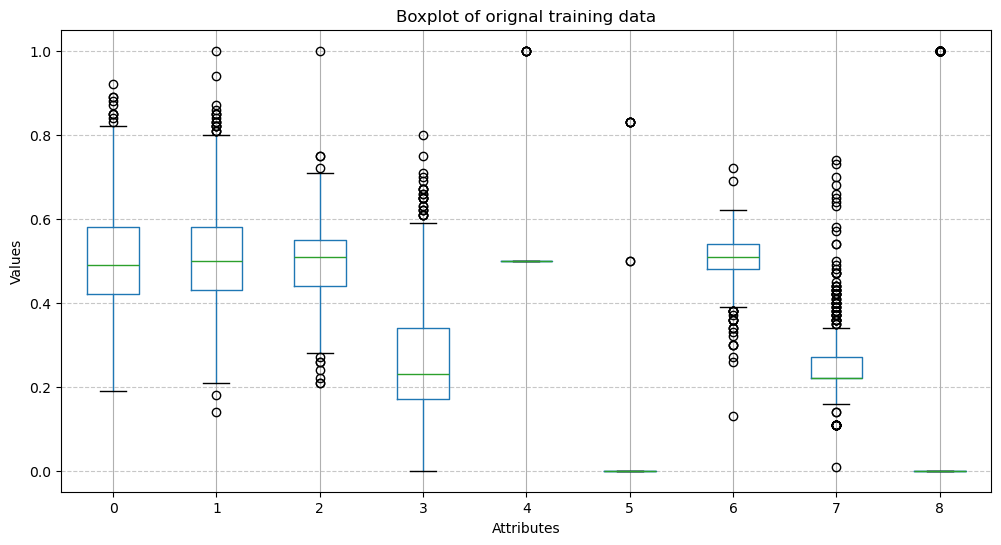

In [66]:
#print the statistics of data 
df_train_x = df_train.drop(columns=['8'])
#df_train_y = df_train[:,-1]

print("Describe the training data")
print(df_train.describe())
# print("Describe the testing data")
# print(df_test_attribute_only.describe())


# check if need to 
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

df_train.boxplot()
plt.title('Boxplot of orignal training data')
plt.xlabel('Attributes')
plt.ylabel('Values')
# plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



skewness of each column
0     0.545921
1     0.545517
2    -0.160764
3     1.159888
4    10.303601
5     9.284937
6    -1.339156
7     2.523775
8     2.707407
dtype: float64

0      0.298679
1      0.609092
2      1.498399
3      0.852621
4    104.484687
5     85.990905
6      5.525437
7      9.573947
8      5.346444
dtype: float64


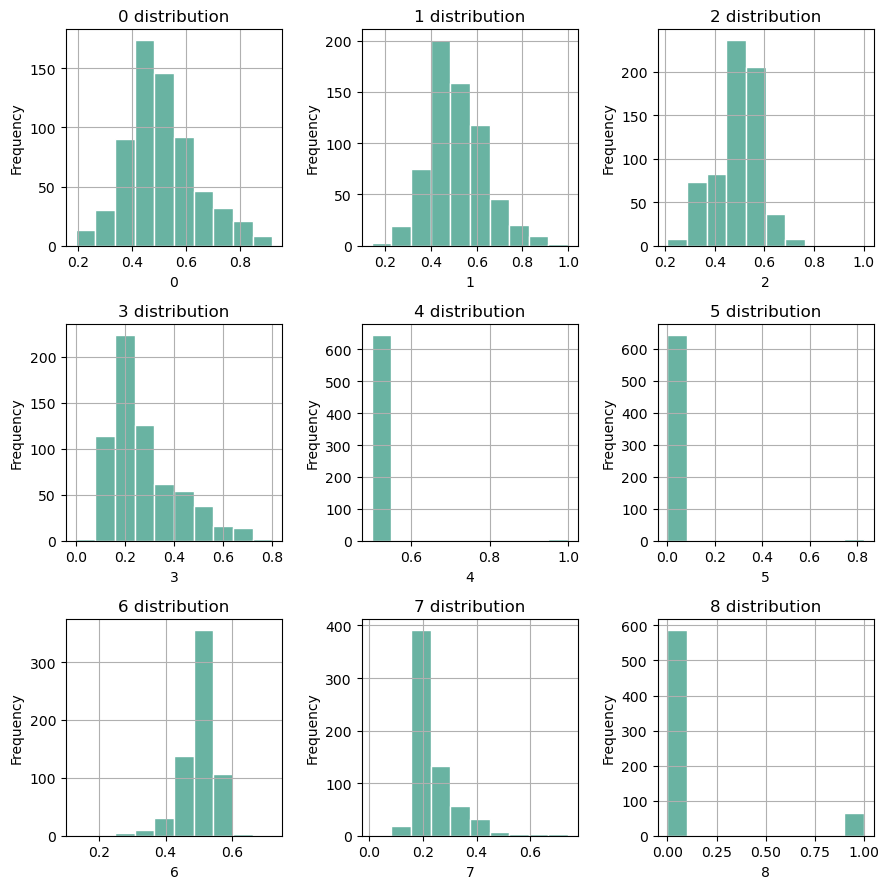

In [67]:
#examine skewness of the data to determin if any transformation is needed
print("skewness of each column")
print(df_train.skew(axis='index'))

print("")
print(df_train.kurt(axis="index"))

# draw histogram of all columns
# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df_train.columns):
    
    # Add the histogram
    df_train[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#69b3a2' # Color of the bins
                   )
    
    # Add title and axis label
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 

# Adjust layout
plt.tight_layout()

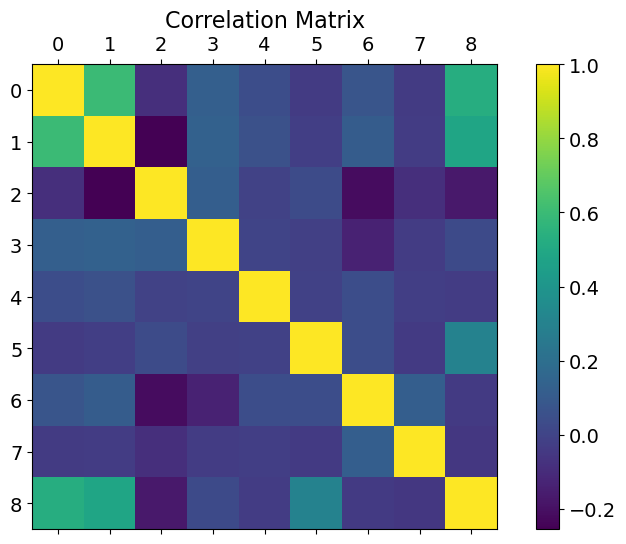

In [68]:
# correlation analysis to determin if dimentional reduction should be proposed. 
f = plt.figure(figsize=(10, 6))
plt.matshow(df_train.corr(), fignum=f.number)
plt.xticks(range(df_train.select_dtypes(['number']).shape[1]), df_train.select_dtypes(['number']).columns, fontsize=14)
plt.yticks(range(df_train.select_dtypes(['number']).shape[1]), df_train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

### Proprocessing/Feature Engineering
#### Brief summary of the charastics of found of training data
Good points of the quality of training data
* no missing data
* all attributes are numerical, easy to apply regression models on

To-be-improved points of training data
* data is NOT normalized and attribute 4, 5 is super extrem cases with almost zero variance of data
* skewness of column 3, 6 is high, 7,8 is higher while 
* attribute 0 & 1 is highly correlated with each other 
#### preprocessing technique to be applied
* reduce dimentions on near-zero variance 
* transform on skewed data to make it more symmetrically distributed
* normalize training data 

propotion of outliers of attribute 4 = 0.009 
propotion of outliers of attribute 4 in test data = 0.011 
propotion of outliers of attribute 5 = 0.012 
propotion of outliers of attribute 5 in test data= 0.020 
          0         1         2         3         6         7
0  1.000000  0.602434 -0.084397  0.126717  0.077290 -0.034498
1  0.602434  1.000000 -0.254642  0.136807  0.110061 -0.032800
2 -0.084397 -0.254642  1.000000  0.119962 -0.214675 -0.083344
3  0.126717  0.136807  0.119962  1.000000 -0.135298 -0.031346
6  0.077290  0.110061 -0.214675 -0.135298  1.000000  0.121690
7 -0.034498 -0.032800 -0.083344 -0.031346  0.121690  1.000000


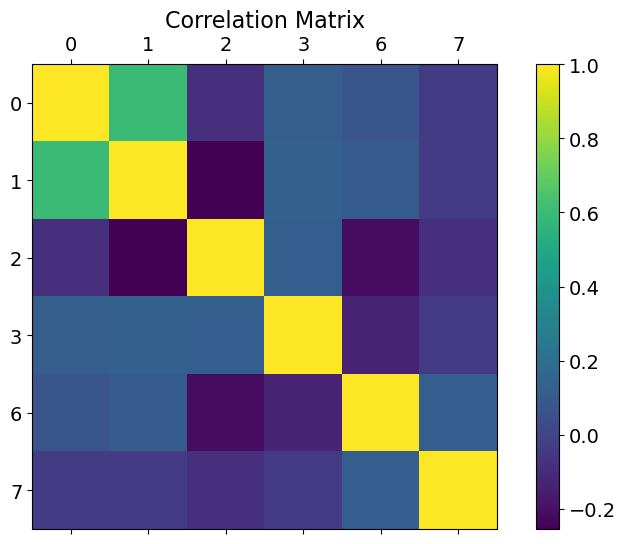

In [88]:
attr4 = df_train['4']
print("propotion of outliers of attribute 4 = %.3f " % (len(attr4[(attr4!=0.5)])/len(attr4)))

attr4 = df_test_attribute_only['4']
print("propotion of outliers of attribute 4 in test data = %.3f " % (len(attr4[(attr4!=0.5)])/len(attr4)))

attr5 = df_train['5']
print("propotion of outliers of attribute 5 = %.3f " % (len(attr5[(attr5!=0)])/len(attr5)))

attr5 = df_test_attribute_only['5']
print("propotion of outliers of attribute 5 in test data= %.3f " % (len(attr5[(attr5!=0)])/len(attr5)))

#elimite attribute 4 &5 which is almost constants with few outlier 
df_train_x = df_train.drop(columns=['4', '5','8'])
df_train_y = df_train['8']

#TODO: 
print(df_train_x.corr())


# correlation after 
f = plt.figure(figsize=(10, 6))
plt.matshow(df_train_x.corr(), fignum=f.number)
plt.xticks(range(df_train_x.select_dtypes(['number']).shape[1]), df_train_x.select_dtypes(['number']).columns, fontsize=14)
plt.yticks(range(df_train_x.select_dtypes(['number']).shape[1]), df_train_x.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()


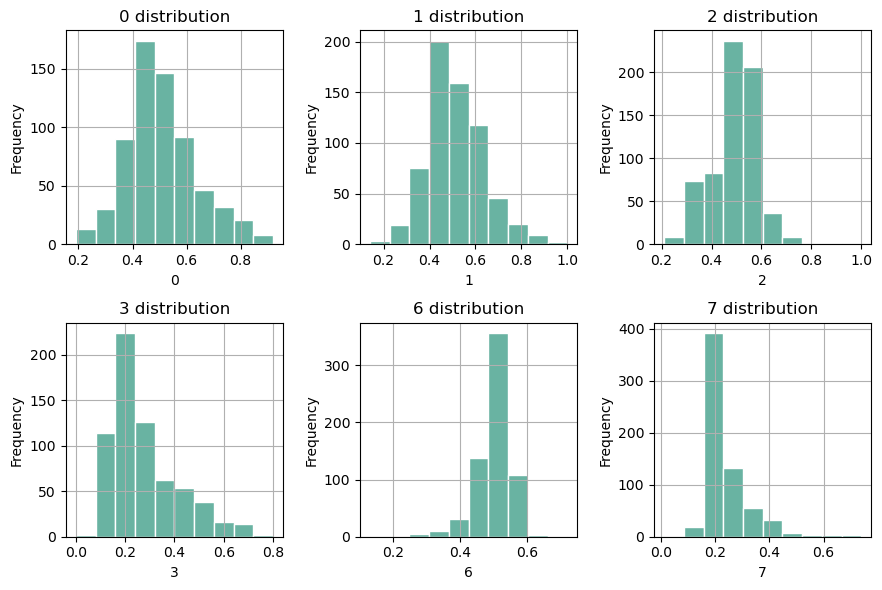

In [70]:
# draw histogram of all columns

#TODO: transform the skewness of data


# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df_train_x.columns):
    
    # Add the histogram
    df_train_x[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#69b3a2' # Color of the bins
                   )
    
    # Add title and axis label
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 

# Adjust layout
plt.tight_layout()

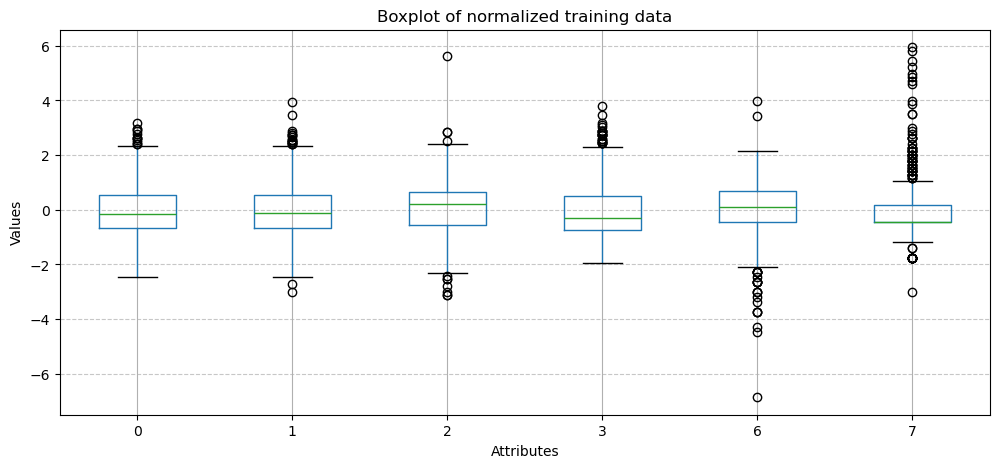

In [71]:
# normalize the data
df_train_x=(df_train_x-df_train_x.mean())/df_train_x.std()

# Create a dot plot
plt.figure(figsize=(12, 5))

df_train_x.boxplot()
plt.title('Boxplot of normalized training data')
plt.xlabel('Attributes')
plt.ylabel('Values')
# plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Model generation and applicaion on predit data
#### Model Selection
Since the nature of attributes are numerical, regressional model should be chosen for training. To immprove the performance of model, ensambling technique are also applied.
#### Model Envaluation
As requred in the assignment, f1 score is the major evalution standard in training the data. 
Cross-validation is applied in training model, and RocCurve is used to visulize the progress of each validation

Let's begin with model selection process on arbitory chosen seperation of training data

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split
df_train_x.shape, df_train_y.shape

X_train, X_test, y_train, y_test = train_test_split(
    df_train_x, df_train_y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(456, 6) (456,)
(196, 6) (196,)


In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(X_train, y_train)

#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 10}


In [79]:
from sklearn.ensemble import RandomForestClassifier

#create a new rf classifier
rf = RandomForestClassifier()

#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)

#fit model to training data
rf_gs.fit(X_train, y_train)

#save best model
rf_best = rf_gs.best_estimator_

#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 50}


In [80]:
from sklearn.linear_model import LogisticRegression

#create a new logistic regression model
log_reg = LogisticRegression()

#fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [86]:
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))
print('log_reg: {}'.format(log_reg.score(X_test, y_test)))

from sklearn.ensemble import VotingClassifier
#create a dictionary of candidate models
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
score = ensemble.score(X_test, y_test)

print("score after ensemble the data: %.3f" % score)
# scores = cross_val_score(ensemble, X_test, y_test, cv=3,  scoring='f1')
# clf = clf.fit(X_train, y_train)
# clf.score(X_test, y_test)


knn: 0.9387755102040817
rf: 0.9489795918367347
log_reg: 0.9489795918367347
score after ensemble the data: 0.944


Here's how classifiers performs in cross-validation context, visualized in ROC curve

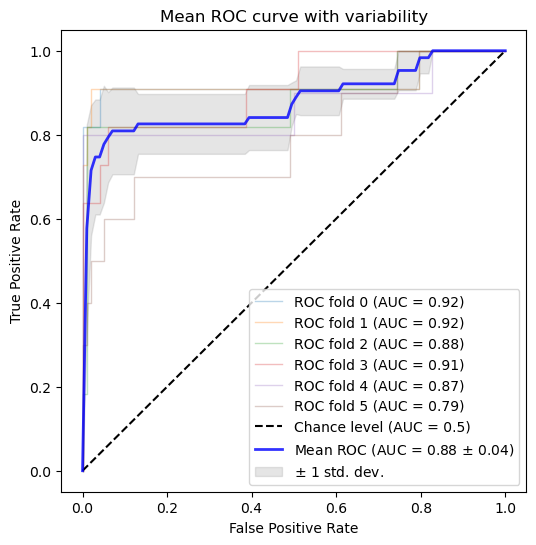

In [92]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import RocCurveDisplay,auc
from sklearn.model_selection import StratifiedKFold

n_splits = 6
cv = StratifiedKFold(n_splits=n_splits)

classifier = LogisticRegression()

# classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(df_train_x, df_train_y)):
    classifier.fit(df_train_x, df_train_y)
    viz = RocCurveDisplay.from_estimator(
        classifier,
        df_train_x.loc(axis=0)[test],
        df_train_y.loc(axis=0)[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == n_splits - 1),
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability",
)
ax.legend(loc="lower right")
plt.show()

### prediction on test data and export
Before prediction, same preprocessing applied on traning data should be applied on test data as well, including
* Dimension reduction on test data 
* Transformation on skewness to make the data more specific
* Normalization
After predition, we need exprot the result in the format required at the beginning of assignment

In [95]:
# Dimension Reduction
test_data = df_test_attribute_only.drop(columns=['4','5'])
#TODO: Transform on skewness

# normalize test data
test_data=(test_data-test_data.mean())/test_data.std()

result= classifier.predict(test_data)
print(result)

#write the result to 
df = pd.DataFrame(result)
df.to_csv('prediction.txt',sep='\t', index=False)
# f = open("prediction.txt", "w")
# f.write(result)
# f.close()

[1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
